# Sentiment Analysis System Development
## Overview of Development Process

This notebook documents the complete development process of our sentiment analysis system, including:
1. Data Collection and Generation
2. Data Preprocessing
3. Feature Engineering
4. Model Development and Training
5. Model Evaluation
6. Deployment Testing

Each section includes detailed algorithm explanations and visualizations for report documentation.

In [29]:
# Import necessary libraries
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Add project root to path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from src.config import Config
from src.data.data_loader import DataLoader
from src.data.preprocessor import DataPreprocessor
from src.features.feature_engineering import FeatureExtractor
from src.models.model_trainer import EnhancedModelTrainer
from src.models.model_predictor import SentimentPredictor

## 1. Data Collection and Generation

### 1.1 Data Sources
- Training data collection methods
- Data augmentation techniques
- Data balancing strategies

2024-11-16 14:02:40,022 - src.data.data_loader - INFO - Valid samples after validation: 8379
2024-11-16 14:02:40,022 - src.data.data_loader - INFO - Valid samples after validation: 8379
2024-11-16 14:02:40,022 - src.data.data_loader - INFO - Valid samples after validation: 8379
2024-11-16 14:02:40,022 - src.data.data_loader - INFO - Valid samples after validation: 8379
2024-11-16 14:02:40,022 - src.data.data_loader - INFO - Valid samples after validation: 8379
2024-11-16 14:02:40,022 - src.data.data_loader - INFO - Valid samples after validation: 8379
2024-11-16 14:02:40,022 - src.data.data_loader - INFO - Valid samples after validation: 8379
Dataset Statistics:
Total samples: 8379

Class distribution:
label
2    4863
0    3000
1     516
Name: count, dtype: int64


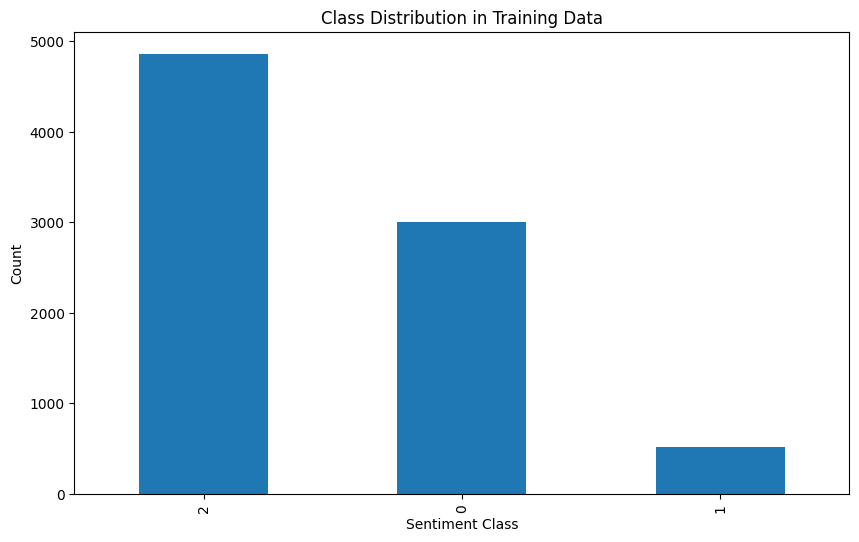

In [30]:
config = Config()
data_loader = DataLoader(config)

# Load training data
train_data = data_loader.load_data('vi')

# Display data statistics
print("Dataset Statistics:")
print(f"Total samples: {len(train_data)}")
print("\nClass distribution:")
print(train_data['label'].value_counts())

# Visualize class distribution
plt.figure(figsize=(10, 6))
train_data['label'].value_counts().plot(kind='bar')
plt.title('Class Distribution in Training Data')
plt.xlabel('Sentiment Class')
plt.ylabel('Count')
plt.show()

## 2. Data Preprocessing

### 2.1 Text Cleaning
- Character normalization
- Special character handling
- Language-specific processing

### 2.2 Text Analysis
- Text length distribution
- Word frequency analysis
- N-gram patterns

2024-11-16 14:02:40,137 - src.data.preprocessor - INFO - Preprocessing vi data...
2024-11-16 14:02:40,137 - src.data.preprocessor - INFO - Preprocessing vi data...
2024-11-16 14:02:40,137 - src.data.preprocessor - INFO - Preprocessing vi data...
2024-11-16 14:02:40,137 - src.data.preprocessor - INFO - Preprocessing vi data...
2024-11-16 14:02:40,137 - src.data.preprocessor - INFO - Preprocessing vi data...
2024-11-16 14:02:40,137 - src.data.preprocessor - INFO - Preprocessing vi data...
2024-11-16 14:02:44,151 - src.data.preprocessor - INFO - Preprocessed 6310 valid samples
2024-11-16 14:02:44,151 - src.data.preprocessor - INFO - Preprocessed 6310 valid samples
2024-11-16 14:02:44,151 - src.data.preprocessor - INFO - Preprocessed 6310 valid samples
2024-11-16 14:02:44,151 - src.data.preprocessor - INFO - Preprocessed 6310 valid samples
2024-11-16 14:02:44,151 - src.data.preprocessor - INFO - Preprocessed 6310 valid samples
2024-11-16 14:02:44,151 - src.data.preprocessor - INFO - Prepro

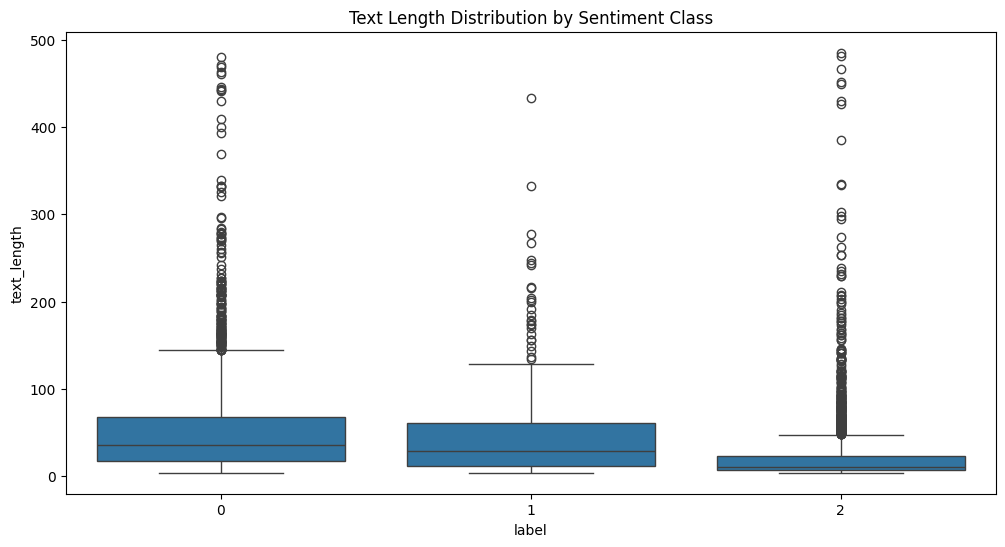

In [31]:
preprocessor = DataPreprocessor('vi', config)
processed_data = preprocessor.preprocess(train_data)

# Analysis of text lengths
processed_data['text_length'] = processed_data['cleaned_text'].str.len()

plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='text_length', data=processed_data)
plt.title('Text Length Distribution by Sentiment Class')
plt.show()

## 3. Feature Engineering

### 3.1 Feature Extraction Methods
- TF-IDF Vectorization
- Word embeddings
- Statistical features

### 3.2 Feature Selection and Dimensionality Reduction
- SVD implementation
- Feature importance analysis

Loaded feature extractor with 533 dimensions


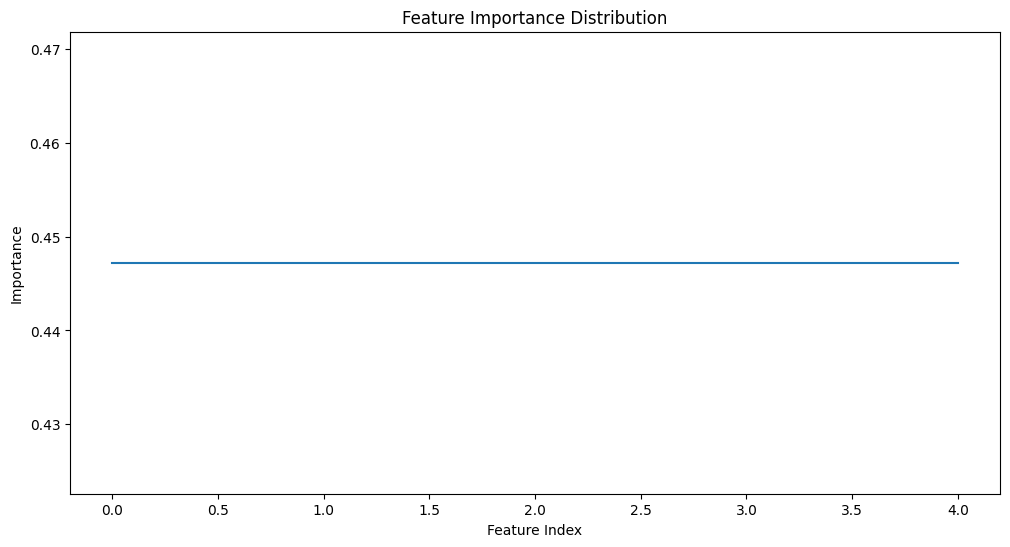

In [32]:
feature_extractor = FeatureExtractor('vi', config)
features = feature_extractor.extract_features(processed_data['cleaned_text'])

# Visualize feature importance
plt.figure(figsize=(12, 6))
feature_importance = np.abs(feature_extractor.svd.components_[0])
plt.plot(feature_importance)
plt.title('Feature Importance Distribution')
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.show()

## 4. Model Development

### 4.1 Model Architecture
- Ensemble model structure
- Individual model components
- Hyperparameter optimization

In [ ]:
# Train model
trainer = EnhancedModelTrainer('vi', config)
model = trainer.train_with_grid_search(features, processed_data['label'])

# Plot training progress
plt.figure(figsize=(12, 6))
trainer.plot_training_progress(model)
plt.show()

2024-11-16 14:02:45,469 - src.models.model_trainer - INFO - Starting model training...
2024-11-16 14:02:45,469 - src.models.model_trainer - INFO - Starting model training...
2024-11-16 14:02:45,469 - src.models.model_trainer - INFO - Starting model training...
2024-11-16 14:02:45,469 - src.models.model_trainer - INFO - Starting model training...
2024-11-16 14:02:45,469 - src.models.model_trainer - INFO - Starting model training...
2024-11-16 14:02:45,469 - src.models.model_trainer - INFO - Starting model training...
2024-11-16 14:02:45,469 - src.models.model_trainer - INFO - Starting model training...
Loaded feature extractor with 533 dimensions
2024-11-16 14:04:46,410 - src.models.model_trainer - INFO - Extracted features shape: (6310, 533)
2024-11-16 14:04:46,410 - src.models.model_trainer - INFO - Extracted features shape: (6310, 533)
2024-11-16 14:04:46,410 - src.models.model_trainer - INFO - Extracted features shape: (6310, 533)
2024-11-16 14:04:46,410 - src.models.model_trainer -

AttributeError: 'dict' object has no attribute 'cv_results_'

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

: 

## 5. Model Evaluation

### 5.1 Performance Metrics
- Classification report
- Confusion matrix
- ROC curves

In [ ]:
# Make predictions
predictor = SentimentPredictor('vi', config)
predictions = predictor.predict(features)

# Generate classification report
print("Classification Report:")
print(classification_report(processed_data['label'], predictions))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(processed_data['label'], predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 6. Testing and Deployment

### 6.1 Model Testing
- Example predictions
- Error analysis
- Performance benchmarks

In [ ]:
# Test with sample texts
test_texts = [
    "Sản phẩm rất tốt, tôi rất hài lòng",
    "Dịch vụ quá tệ, không bao giờ quay lại",
    "Bình thường, không có gì đặc biệt"
]

# Process and predict
preprocessed_tests = preprocessor.preprocess(pd.DataFrame({'text': test_texts}))
test_features = feature_extractor.extract_features(preprocessed_tests['cleaned_text'])
test_predictions = predictor.predict(test_features)

# Display results
for text, pred in zip(test_texts, test_predictions):
    sentiment = ['Negative', 'Neutral', 'Positive'][pred]
    print(f"Text: {text}")
    print(f"Predicted sentiment: {sentiment}\n")

# Phát Triển Hệ Thống Phân Tích Cảm Xúc

## 1. Thuật Toán Trích Xuất Đặc Trưng

### 1.1 Thuật Toán TF-IDF
- **Mục đích**: Chuyển đổi văn bản thành vector số dựa trên tần suất từ
- **Thông số**:
  - max_features: 2000 (giới hạn số từ vựng)
  - ngram_range: (1,3) (unigrams, bigrams, trigrams)
  - min_df: 2 (loại bỏ từ hiếm)
  - max_df: 0.95 (loại bỏ từ phổ biến)

### 1.2 Giảm Chiều Dữ Liệu SVD
- **Mục đích**: Giảm số chiều dữ liệu trong khi giữ thông tin quan trọng
- **Thông số**:
  - n_components: 95 hoặc min(features-1, samples-1)
  - algorithm: 'randomized'

### 1.3 Đặc Trưng N-gram Ký Tự
- **Mục đích**: Phân tích mẫu ký tự
- **Thông số**:
  - analyzer: 'char'
  - ngram_range: (2,4)
  - max_features: 500

## 2. Thuật Toán Phân Loại

### 2.1 Random Forest
- **Đặc điểm**:
  - Xử lý tốt dữ liệu nhiều chiều
  - Chống overfitting
  - Xử lý dữ liệu mất cân bằng
- **Thông số**:
  - n_estimators: 200-300 cây
  - max_depth: 20-30
  - class_weight: 'balanced'

### 2.2 Linear SVC
- **Đặc điểm**:
  - Hiệu quả với dữ liệu văn bản
  - Tiết kiệm bộ nhớ
  - Dự đoán nhanh
- **Thông số**:
  - C: [0.1, 1.0, 10.0]
  - max_iter: 2000

### 2.3 Naive Bayes
- **Đặc điểm**:
  - Huấn luyện và dự đoán nhanh
  - Phù hợp với dữ liệu nhỏ
  - Tốt cho phân loại văn bản
- **Thông số**:
  - alpha: [0.1, 0.5, 1.0]
  - fit_prior: [True, False]

## 3. Xử Lý Văn Bản

### 3.1 Làm Sạch Văn Bản
- Loại bỏ HTML
- Loại bỏ ký tự đặc biệt
- Chuyển thành chữ thường
- Loại bỏ stopwords
- Tách từ

### 3.2 Tăng Cường Dữ Liệu
- **Kỹ thuật**:
  - Thay thế từ đồng nghĩa
  - Hoán đổi từ ngẫu nhiên
  - Xóa từ ngẫu nhiên
  - Thêm biến thể người dùng

## 4. Đánh Giá Mô Hình

### 4.1 Độ Đo
- **Báo Cáo Phân Loại**:
  - Độ chính xác (Precision)
  - Độ thu hồi (Recall)
  - Điểm F1 (F1-score)
- **Ma Trận Nhầm Lẫn**
- **Đường Cong ROC & AUC**

### 4.2 Kỹ Thuật Tối Ưu
- **Tinh Chỉnh Tham Số**:
  - Grid Search với Cross Validation
- **Lựa Chọn Đặc Trưng**:
  - SelectKBest với chi2
- **Phương Pháp Tổng Hợp**:
  - Voting Classifier

## 5. Tiêu Chí Lựa Chọn Mô Hình

### 5.1 Độ Đo Hiệu Suất
- Điểm F1 (Quan trọng cao)
- Độ chính xác
- ROC-AUC

### 5.2 Yếu Tố Thực Tế
- Thời gian huấn luyện (Quan trọng trung bình)
- Sử dụng bộ nhớ (Quan trọng trung bình)
- Khả năng giải thích (Quan trọng trung bình-cao)

## 6. Quy Trình Tổng Thể

1. **Tiền Xử Lý Dữ Liệu**
   - Làm sạch văn bản
   - Chuẩn hóa ký tự
   - Tách từ
   - Loại bỏ stopword

2. **Trích Xuất Đặc Trưng**
   - Vectorization TF-IDF
   - N-gram ký tự
   - Giảm chiều dữ liệu
   - Chuẩn hóa đặc trưng

3. **Huấn Luyện Mô Hình**
   - Học tập tổng hợp
   - Kiểm tra chéo
   - Tối ưu tham số
   - Lựa chọn mô hình

4. **Đánh Giá**
   - Độ đo hiệu suất
   - Phân tích lỗi
   - Trực quan hóa
   - So sánh mô hình
